# Ex) Baseball statistics
$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_
_<div style="text-align: right"> Jun-Hyon Cho (050973@khu.ac.kr) </div>_

Throughout the baseball history, the management guys of ball-clubs have tried to evaluate baseball players, and they created some statistics such as 'Average (타율)', 'Runs Batted In (RBI, 타점)', 'Earned Run Average (ERA, 평균자책점)' and so on. But these have some limitations in measuring the "real value" of the players, so some complicated mathematical stuffs came in and a new approach called 'SABERMETRICS' was introduced.


We will first download a dataset describing the starting pitchers' statistics from the MLB season 2018. For your information, these can be obtained from 
[fangraphs.com](https://www.fangraphs.com/leaders.aspx?pos=all&stats=sta&lg=all&qual=y&type=0&season=2018&month=0&season1=2018&ind=0&team=0&rost=0&age=0&filter=&players=0&startdate=2018-01-01&enddate=2018-12-31).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/meongrang/aaaa/master/2018_MLB_Starters_Standard')
df

,Name,Team,W,L,ERA,G,GS,CG,ShO,SV,HLD,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,playerid
0,Jacob deGrom,Mets,10,9,1.70,32,32,1,0,0,0,0,217.0,835,152,48,41,10,46,3,5,2,0,269,10954
1,Blake Snell,Rays,21,5,1.89,31,31,0,0,0,0,0,180.2,700,112,41,38,16,64,2,1,13,0,221,13543
2,Trevor Bauer,Indians,12,6,2.26,27,27,0,0,0,0,0,171.1,703,132,51,43,9,57,2,9,12,0,219,12703
3,Aaron Nola,Phillies,17,6,2.37,33,33,0,0,0,0,0,212.1,831,149,57,56,17,58,3,7,4,1,224,16149
4,Justin Verlander,Astros,16,9,2.52,34,34,1,1,0,0,0,214.0,833,156,63,60,28,37,0,8,5,2,290,8700
5,Max Scherzer,Nationals,18,7,2.53,33,33,2,1,0,0,0,220.2,866,150,66,62,23,51,4,12,4,1,300,3137
6,Miles Mikolas,Cardinals,18,4,2.83,32,32,1,1,0,0,0,200.2,808,186,70,63,16,29,4,7,2,1,146,9803
7,Kyle Freeland,Rockies,17,7,2.85,33,33,0,0,0,0,0,202.1,844,182,64,64,17,70,2,6,2,0,173,16256
8,Mike Foltynewicz,Braves,13,10,2.85,31,31,2,1,0,0,0,183.0,744,130,65,58,17,68,3,6,7,2,202,10811
9,Gerrit Cole,Astros,15,5,2.88,32,32,1,1,0,0,0,200.1,799,143,68,64,19,64,0,7,9,0,276,13125


One of the most famous stats in sabermetrics is the 'Fielding Independent Pitching (FIP, 수비무관 평균자책점)'. In a ball game, earned runs are not only decided by the pitching skills, but also decided by a lot of other factors such as the size of the field and the fielding skills of position players. Hence, sabermetricians who deal with sabermetrics pay attention to the position-player-independent factors. For example, the strike-outs or the base-on-balls are independent of the performances of position players, but only a pitcher is involved. So the FIP can be represented by using these independent factors as follows.

<br>
$$
FIP = \frac{13HR+3(BB-IBB+HBP)-2SO}{IP} +3.20
$$

<br>
Here, IP, BB, IBB, HBP, HR and SO denote Inning Pitched, Base on Balls, Intentional Base on Balls, Hit By Pitch, HomeRuns, and StrikeOuts, respectively. 

**(Problem 1)** Calculate the FIP of the pitchers using the above formula, and append it as a new column on your dataframe. Display the results on a plot.

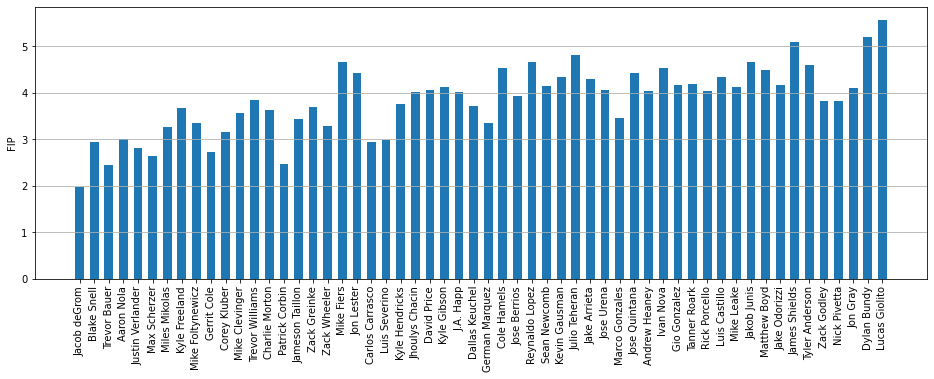

In [ ]:
# your code here
df['FIP'] = pd.Series([((13*df.loc[i, 'HR'] + 3*(df.loc[i, 'BB'] - df.loc[i, 'IBB'] + df.loc[i, 'HBP']) - 2*df.loc[i, 'SO']) / df.loc[i, 'IP']) + 3.2 for i in df.index], index=df.index)

plt.figure(figsize=(16,5))
plt.bar(df['Name'], df['FIP'], width = 0.6)
plt.ylabel('FIP')
plt.grid(axis='y')
plt.xticks(rotation=90)

plt.show()


<br>

**(Problem 2)** The MLB is divided into two leagues; the National League(NL) and the American League(AL). By running below cell, you can get the lists made of the NL and the AL teams.

In [ ]:
AL = ['Yankees', 'Rays', 'Red Sox', 'Blue Jays', 'Orioles', 'Twins', 'Indians', 'White Sox', 'Royals', 'Tigers', \
      'Astros', 'Athletics', 'Rangers', 'Angels', 'Mariners']
NL = ['Braves', 'Nationals', 'Mets', 'Phillies', 'Marlins', 'Cardinals', 'Brewers', 'Cubs', 'Reds', 'Pirates', 'Dodgers', \
      'Diamondbacks', 'Giants', 'Padres', 'Rockies']

For each league, list the top five pitchers with lowest FIPs. You may ignore the players with "- - -" on the "Team" field.

In [ ]:
# your code here
ALPitchers = pd.DataFrame(df.loc[0]).T
NLPitchers = pd.DataFrame(df.loc[0]).T
ALPitchers.drop(0, inplace = True)
NLPitchers.drop(0, inplace = True)

for i in range(len(df)):
  if df.loc[i, 'Team'] in AL:
    ALPitchers = ALPitchers.append(df.loc[i])
  else:
    NLPitchers = NLPitchers.append(df.loc[i])

ALPitchers = ALPitchers.sort_values(by = 'FIP')
NLPitchers = NLPitchers.sort_values(by = 'FIP')

ALPitchers.index = list(range(len(ALPitchers)))
NLPitchers.index = list(range(len(NLPitchers)))

ALTop = []
NLTop = []

for i in range(5):
  ALTop.append(ALPitchers.loc[i, 'Name'])
  NLTop.append(NLPitchers.loc[i, 'Name'])

print('AL top 5 pitchers for FIP:' + str(ALTop))
print('NL top 5 pitchers for FIP:' + str(NLTop))

AL top 5 pitchers for FIP:['Trevor Bauer', 'Gerrit Cole', 'Justin Verlander', 'Blake Snell', 'Carlos Carrasco']
NL top 5 pitchers for FIP:['Jacob deGrom', 'Patrick Corbin', 'Max Scherzer', 'Aaron Nola', 'Miles Mikolas']


**(Problem 3)** Every year, the Cy Young Award is given to the most outstanding pitcher in each league of MLB. The award was introduced in 1956 by Commissioner Ford Frick and approved by the Baseball Writers Association of America. The award is named in honor of Hall of Fame pitcher Cy Young who died a year earlier in 1955. Based on the given dataset, we would like to anticipate who the recipient will be. To predict winners, we can use the following two predictors. 

<br>

_Tom Tango Cy Young Award predictor:_

<br>

$$
\text{Cy Young Points (Tom Tango)} = \frac{1}{2}IP-ER + \frac{1}{10}SO + W
$$

<br>

_ESPN Cy Young Award predictot:_

<br>

$$
\text{Cy Young Points (ESPN)} = \frac{5}{9}IP - ER +\frac{SO}{12}+2.5SV + ShO + 6W-2L
$$

<br>

By using the above two models, predict the future Cy Young Award recipients  from each league. 


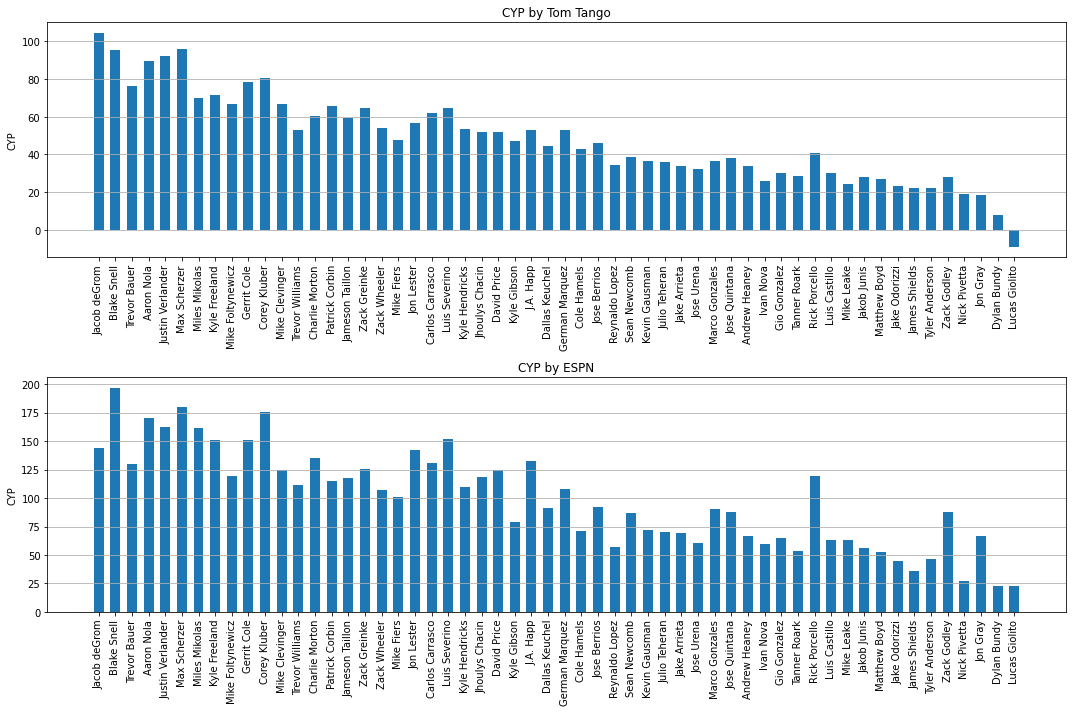

According to Tom Tango's Formula, Blake Snell and Jacob deGrom will win Cy Young Award in AL and NL respectively.
According to ESPN's Formula, Blake Snell and Max Scherzer will win Cy Young Award in AL and NL respectively.


In [ ]:
# your code here

df['CYP by Tom Tango'] = pd.Series([0.5*df.loc[i, 'IP'] - df.loc[i, 'ER'] + 0.1*df.loc[i, 'SO'] + df.loc[i, 'W'] for i in df.index], index=df.index)
df['CYP by ESPN'] = pd.Series([(5/9)*df.loc[i, 'IP'] - df.loc[i, 'ER'] + df.loc[i, 'SO']/12 + 2.5*df.loc[i, 'SV'] + df.loc[i, 'ShO'] + 6*df.loc[i, 'W'] - 2*df.loc[i, 'L'] for i in df.index], index=df.index)

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.bar(df['Name'], df['CYP by Tom Tango'], width = 0.6, )
plt.title('CYP by Tom Tango')
plt.ylabel('CYP')
plt.grid(axis='y')
plt.xticks(rotation=90)


plt.subplot(2,1,2)
plt.bar(df['Name'], df['CYP by ESPN'], width = 0.6)
plt.title('CYP by ESPN')
plt.ylabel('CYP')
plt.grid(axis='y')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# By using the above two models, predict the future Cy Young Award recipients from each league.

CyYoungPredicts = [['', ''], ['', '']]

df = df.sort_values(by='CYP by Tom Tango', ascending = False)
df.index = range(len(df))

if df.loc[0, 'Team'] in AL:
  CyYoungPredicts[0][0] = df.loc[0, 'Name']
  for i in range(1, len(df)):
    if df.loc[i, 'Team'] in NL:
      CyYoungPredicts[0][1] = df.loc[i, 'Name']
      break
else:
  CyYoungPredicts[0][1] = df.loc[0, 'Name']
  for i in range(1, len(df)):
    if df.loc[i, 'Team'] in AL:
      CyYoungPredicts[0][0] = df.loc[i, 'Name']
      break

df = df.sort_values(by='CYP by ESPN', ascending = False)
df.index = range(len(df))

if df.loc[0, 'Team'] in AL:
  CyYoungPredicts[1][0] = df.loc[0, 'Name']
  for i in range(1, len(df)):
    if df.loc[i, 'Team'] in NL:
      CyYoungPredicts[1][1] = df.loc[i, 'Name']
      break
else:
  CyYoungPredicts[1][1] = df.loc[0, 'Name']
  for i in range(1, len(df)):
    if df.loc[i, 'Team'] in AL:
      CyYoungPredicts[1][0] = df.loc[i, 'Name']
      break

print('According to Tom Tango\'s Formula, {} and {} will win Cy Young Award in AL and NL respectively.'.format(CyYoungPredicts[0][0], CyYoungPredicts[0][1]))
print('According to ESPN\'s Formula, {} and {} will win Cy Young Award in AL and NL respectively.'.format(CyYoungPredicts[1][0], CyYoungPredicts[1][1]))

df = df.sort_values(by = 'ERA')
df.index = range(len(df))

# 일단 맞춘 건 Tom Tango 공식
# ESPN 공식은 승수와 패수를 너무 과대평가 한 것 같다

<br>

The list of the Cy Young Award winners, including the season 2018, can be found here: 
[https://www.baseball-reference.com/bullpen/Cy_Young_Award](https://www.baseball-reference.com/bullpen/Cy_Young_Award).

Check if your predictors made reasonable predictions.
